<a href="https://colab.research.google.com/github/sightes/RNA-UBO/blob/main/MLP_Clase_11_06_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

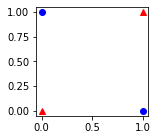

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X=np.asarray([
              [0,0],
              [0,1],
              [1,0],
              [1,1]  ])

y=np.asarray([0,1,1,0])

fig= plt.figure(figsize=(2,2))
plt.plot(X[:,0][y==0],X[:,1][y==0],'r^')
plt.plot(X[:,0][y==1],X[:,1][y==1],'bo')
y=y.reshape(-1,1)

In [ ]:
learning_rate=0.01
iterations=100000
N=y.size
input_size=2
hidden_size=10
output_size=1
results=pd.DataFrame(columns=['mse','accuracy'])

In [ ]:
np.random.seed()
W1=np.random.normal(scale=0.5, size=(input_size,hidden_size))
W2=np.random.normal(scale=0.5, size=(hidden_size,output_size))

In [ ]:
def sigmoide(x):
   return 1/(1+np.exp(-x))
def mse(y_pred,y_true):
  return ((y_pred-y_true)**2).sum()/(2*y_pred.size)
def accuracy(y_pred,y_true):
  acc=y_pred.argmax(axis=1)== y_true.argmax(axis=1)
  return (acc.mean())


In [ ]:
for itr in range(iterations):
  Z1=np.dot(X,W1)
  A1=sigmoide(Z1)

  Z2=np.dot(A1,W2)
  A2=sigmoide(Z2)

  error=mse(A2,y)
  acc=accuracy(A2,y)
  results=results.append({"mse":error,"accuracy":acc},ignore_index=True)

  E1=A2-y
  dW1=E1*A2*(1-A2)

  E2=np.dot(dW1,W2.T)
  dW2=E2*A1*(1-A1)

  W2_update=np.dot(A1.T,dW1)/N
  W1_update=np.dot(X.T,dW2)/N

  W2=W2- learning_rate * W2_update
  W1=W1- learning_rate * W1_update



In [ ]:
  Z1=np.dot(X,W1)
  A1=sigmoide(Z1)

  Z2=np.dot(A1,W2)
  A2=sigmoide(Z2)

  A2

array([[0.28741408],
       [0.57355153],
       [0.61787385],
       [0.52977115]])

In [ ]:
X[:,0][(A2<0.55)*1]

array([[0],
       [0],
       [0],
       [0]])

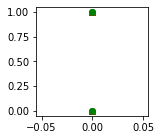

In [ ]:
fig= plt.figure(figsize=(2,2))
plt.plot(X[:,0][(A2<0.55)*1],X[:,1][(A2<0.55)*1],'r^')
plt.plot(X[:,0][(A2>=0.55)*1],X[:,1][(A2>=0.55)*1],'go')

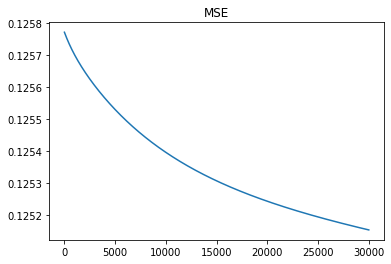

In [ ]:
results.mse.plot(title='MSE')

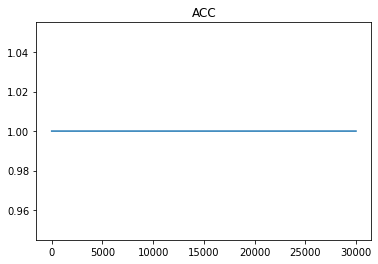

In [ ]:
results.accuracy.plot(title='ACC')